## Visualizing How Baseball Has Changed Over Time

In [1]:
import pandas as pd
pd.options.display.max_columns = 50

In [2]:
#Read in Data
df = pd.read_csv('batting.csv')

In [4]:
df.sample(10, random_state=10)

,playerid,yearid,stint,teamid,lgid,g,ab,r,h,2b,3b,HR,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
93198,ellsbja01,2010,1,BOS,AL,18,78.0,10.0,15.0,4.0,0.0,0.0,5.0,7.0,1.0,4.0,9.0,0.0,1.0,0.0,0.0,0.0
36401,delsiji01,1953,1,DET,AL,138,479.0,77.0,138.0,26.0,6.0,11.0,62.0,1.0,3.0,66.0,39.0,NaN,5.0,2.0,NaN,8.0
1433,arundha01,1882,1,PT1,AA,14,53.0,8.0,10.0,0.0,0.0,0.0,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
54546,borgmgl01,1977,1,MIN,AL,17,43.0,12.0,11.0,1.0,0.0,2.0,7.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0,0.0,1.0
81543,patteco01,2001,1,CHN,NL,59,131.0,26.0,29.0,3.0,0.0,4.0,14.0,4.0,0.0,6.0,33.0,0.0,3.0,2.0,3.0,1.0
816,mcveyca01,1876,1,CHN,NL,63,308.0,62.0,107.0,15.0,0.0,1.0,53.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
7147,murphya01,1897,1,NY1,NL,5,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,NaN,NaN,0.0,0.0,NaN,NaN
59493,escarch01,1982,1,CHA,AL,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28177,castege01,1939,1,PHA,AL,28,43.0,2.0,9.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,8.0,NaN,0.0,2.0,NaN,0.0
18072,thorpji01,1919,2,BSN,NL,60,156.0,16.0,51.0,7.0,3.0,1.0,25.0,7.0,NaN,6.0,30.0,NaN,2.0,4.0,NaN,NaN


In [5]:
# Replace all Null values with 0
df.fillna(0, inplace=True)

In [6]:
# Group by year AND player 
# If a player has multiple entries in same year,
#   due to playing on more than one team,
#   these will be combined to give stats for the whole year for the player
full_year_stats = df.groupby(['yearid', 'playerid']).sum()

In [7]:
full_year_stats.sample(10, random_state=10)

,,stint,g,ab,r,h,2b,3b,HR,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
yearid,playerid,,,,,,,,,,,,,,,,,,
1968,cashno01,1,127,411.0,50.0,108.0,15.0,1.0,25.0,63.0,1.0,1.0,39.0,70.0,7.0,3.0,2.0,3.0,12.0
1899,meekijo01,3,31,99.0,11.0,19.0,3.0,2.0,1.0,8.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,melenlu01,1,88,173.0,25.0,39.0,3.0,1.0,0.0,11.0,2.0,0.0,24.0,29.0,1.0,0.0,3.0,0.0,7.0
1951,zarilal01,1,120,382.0,56.0,98.0,21.0,2.0,10.0,60.0,2.0,4.0,60.0,57.0,0.0,4.0,3.0,0.0,9.0
1993,orsuljo01,1,134,409.0,59.0,116.0,15.0,4.0,8.0,35.0,5.0,4.0,28.0,25.0,1.0,2.0,0.0,2.0,6.0
1913,kuhnwa01,1,26,50.0,5.0,8.0,1.0,0.0,0.0,5.0,1.0,0.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0
1985,keedypa01,1,3,4.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,hevinjo02,1,41,22.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
1953,baczefr01,3,33,47.0,4.0,9.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,15.0,0.0,0.0,4.0,0.0,0.0


In [8]:
# Add 'Plate Appearances', determined by adding at-bats, walks, and hit by pitches
full_year_stats['pa'] = full_year_stats['ab'] + full_year_stats['bb'] + full_year_stats['hbp'] + full_year_stats['sf']
# Add Batting Average, determined by dividing hits by at-bats
full_year_stats['avg'] = round(full_year_stats['h'] / full_year_stats['ab'], 3)
# Add On-Base-Percentage, determined by hits, walks, and hit by pitches, all divided by total plate appearances
full_year_stats['obp'] = (full_year_stats['h'] + full_year_stats['bb'] + full_year_stats['hbp']) / full_year_stats['pa']
# Add Single column, which are all hits that are NOT doubles, triples, or home runs
full_year_stats['1b'] = full_year_stats['h'] - (full_year_stats['2b'] + full_year_stats['3b'] + full_year_stats['HR'])
# Add Total Bases, where singles count as 1, doubles 2, triples 3, and home runs 4
full_year_stats['tb'] = full_year_stats['1b'] + (full_year_stats['2b']*2) + (full_year_stats['3b']*3) + (full_year_stats['HR']*4)
# Add Slugging Percentage, determined by a batters total bases reached, divided by their at-bats
full_year_stats['slg'] = round(full_year_stats['tb'] / full_year_stats['ab'], 3)
# Add On-Bases-Plus-Slugging, which is simply on-base-percentage plus slugging percentage
full_year_stats['ops'] = full_year_stats['obp'] + full_year_stats['slg']
# With full year stats, stint column no longer relevant
full_year_stats.drop(['stint'], axis=1, inplace=True)
# Reorder dataframe in a more intuitive way
full_year_stats = full_year_stats[['g', 'pa', 'ab', 'bb', 'h', '1b', '2b', '3b', 
                                   '3b', 'HR', 'tb', 'r', 'rbi', 'sb', 'cs', 'so', 'ibb', 
                                   'hbp', 'sh', 'sf', 'gidp', 'avg', 'obp', 'slg', 'ops']]

full_year_stats.sample(10, random_state=10)

,,g,pa,ab,bb,h,1b,2b,3b,3b,HR,tb,r,rbi,sb,cs,so,ibb,hbp,sh,sf,gidp,avg,obp,slg,ops
yearid,playerid,,,,,,,,,,,,,,,,,,,,,,,,,
1968,cashno01,127,456.0,411.0,39.0,108.0,67.0,15.0,1.0,1.0,25.0,200.0,50.0,63.0,1.0,1.0,70.0,7.0,3.0,2.0,3.0,12.0,0.263,0.328947,0.487,0.815947
1899,meekijo01,31,104.0,99.0,5.0,19.0,13.0,3.0,2.0,2.0,1.0,29.0,11.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192,0.230769,0.293,0.523769
1971,melenlu01,88,197.0,173.0,24.0,39.0,35.0,3.0,1.0,1.0,0.0,44.0,25.0,11.0,2.0,0.0,29.0,1.0,0.0,3.0,0.0,7.0,0.225,0.319797,0.254,0.573797
1951,zarilal01,120,446.0,382.0,60.0,98.0,65.0,21.0,2.0,2.0,10.0,153.0,56.0,60.0,2.0,4.0,57.0,0.0,4.0,3.0,0.0,9.0,0.257,0.363229,0.401,0.764229
1993,orsuljo01,134,441.0,409.0,28.0,116.0,89.0,15.0,4.0,4.0,8.0,163.0,59.0,35.0,5.0,4.0,25.0,1.0,2.0,0.0,2.0,6.0,0.284,0.331066,0.399,0.730066
1913,kuhnwa01,26,63.0,50.0,13.0,8.0,7.0,1.0,0.0,0.0,0.0,9.0,5.0,5.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.160,0.333333,0.180,0.513333
1985,keedypa01,3,4.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.500000,1.500,2.000000
1930,hevinjo02,41,22.0,22.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.227,0.227273,0.273,0.500273
1953,baczefr01,33,48.0,47.0,1.0,9.0,8.0,0.0,0.0,0.0,1.0,12.0,4.0,2.0,0.0,0.0,15.0,0.0,0.0,4.0,0.0,0.0,0.191,0.208333,0.255,0.463333


In [9]:
# Filter out all batters that are not 'qualified' for each season
#   qualified defined as - any batter who had more than 400 at-bats for the given season
full_year_stats_qual = full_year_stats[full_year_stats['ab'] > 400]

In [10]:
full_year_stats_qual

g     pa     ab     bb      h     1b    2b    3b    3b  \
yearid playerid                                                              
1875   wrighge01   79  410.0  408.0    2.0  136.0  107.0  20.0   7.0   7.0   
1879   hinespa01   85  417.0  409.0    8.0  146.0  109.0  25.0  10.0  10.0   
1883   ansonca01   98  431.0  413.0   18.0  127.0   86.0  36.0   5.0   5.0   
       birchju01   96  468.0  448.0   20.0  108.0   96.0  10.0   1.0   1.0   
       bradyst01   97  443.0  432.0   11.0  117.0   99.0  12.0   6.0   6.0   
...               ...    ...    ...    ...    ...    ...   ...   ...   ...   
2015   vottojo01  158  695.0  545.0  143.0  171.0  107.0  33.0   2.0   2.0   
       walkene01  151  603.0  543.0   44.0  146.0   95.0  32.0   3.0   3.0   
       wongko01   150  613.0  557.0   36.0  146.0  103.0  28.0   4.0   4.0   
       yelicch01  126  525.0  476.0   47.0  143.0  104.0  30.0   2.0   2.0   
       zobribe01  126  535.0  467.0   62.0  129.0   77.0  36.0   3.0   3.0   

                    HR     tb      r   rbi    sb   cs     so   ibb   hbp   sh  \
yearid playerid                                                                 
1875   wrighge01   2.0  176.0  106.0  61.0  13.0  6.0    6.0   0.0   0.0  0.0   
1879   hinespa01   2.0  197.0   81.0  52.0   0.0  0.0   16.0   0.0   0.0  0.0   
1883   ansonca01   0.0  173.0   70.0  68.0   0.0  0.0    9.0   0.0   0.0  0.0   
       birchju01   1.0  123.0   95.0  24.0   0.0  0.0    0.0   0.0   0.0  0.0   
       bradyst01   0.0  141.0   69.0   0.0   0.0  0.0    0.0   0.0   0.0  0.0   
...                ...    ...    ...   ...   ...  ...    ...   ...   ...  ...   
2015   vottojo01  29.0  295.0   95.0  80.0  11.0  3.0  135.0  15.0   5.0  0.0   
       walkene01  16.0  232.0   69.0  71.0   4.0  1.0  110.0   5.0   8.0  0.0   
       wongko01   11.0  215.0   71.0  61.0  15.0  8.0   95.0   2.0  15.0  0.0   
       yelicch01   7.0  198.0   63.0  44.0  16.0  5.0  101.0   2.0   2.0  0.0   
       zobribe01  13.0  210.0   76.0  56.0   3.0  4.0   56.0   3.0   1.0  0.0   

                   sf  gidp    avg       obp    slg       ops  
yearid playerid                                                
1875   wrighge01  0.0   0.0  0.333  0.336585  0.431  0.767585  
1879   hinespa01  0.0   0.0  0.357  0.369305  0.482  0.851305  
1883   ansonca01  0.0   0.0  0.308  0.336427  0.419  0.755427  
       birchju01  0.0   0.0  0.241  0.273504  0.275  0.548504  
       bradyst01  0.0   0.0  0.271  0.288939  0.326  0.614939  
...               ...   ...    ...       ...    ...       ...  
2015   vottojo01  2.0  11.0  0.314  0.458993  0.541  0.999993  
       walkene01  8.0   9.0  0.269  0.328358  0.427  0.755358  
       wongko01   5.0  10.0  0.262  0.321370  0.386  0.707370  
       yelicch01  0.0  13.0  0.300  0.365714  0.416  0.781714  
       zobribe01  5.0   8.0  0.276  0.358879  0.450  0.808879  

[15467 rows x 25 columns]

In [11]:
# Get the number of batters that qualified based on above definition each season
per_year_qual = full_year_stats_qual.groupby('yearid').count()

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

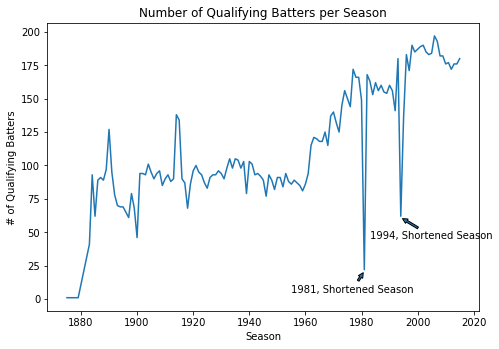

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(per_year_qual.index.values, per_year_qual['g'].values)
ax.set_xlabel('Season')
ax.set_ylabel('# of Qualifying Batters')
ax.set_title('Number of Qualifying Batters per Season')
ax.annotate("1981, Shortened Season", (1981,21), (1955,5), 
             arrowprops={'arrowstyle' : 'simple'})
ax.annotate("1994, Shortened Season", (1994,61), (1983,45), 
            arrowprops={'arrowstyle' : 'simple'})
plt.show()

In [14]:
# Totalled statistics for each year
year_totals = full_year_stats.groupby('yearid').sum()

In [15]:
# Add Home Run Percentage to year_totals,
# defined as the percentage of at-bats that resulted in home runs for the year
year_totals['HR%'] = round(year_totals['HR'] / year_totals['ab'], 3)

In [16]:
year_totals.sample(10, random_state=10)

,g,pa,ab,bb,h,1b,2b,3b,3b,HR,tb,r,rbi,sb,cs,so,ibb,hbp,sh,sf,gidp,avg,obp,slg,ops,HR%
yearid,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,50632,147682.0,132140.0,13727.0,33555.0,23964.0,5235.0,927.0,927.0,3429.0,50931.0,16880.0,15762.0,1908.0,1078.0,22374.0,1464.0,825.0,1630.0,990.0,3020.0,156.501,207.773015,222.634,428.407015,0.026
1931,27790,94684.0,86624.0,7679.0,24046.0,17399.0,4508.0,1070.0,1070.0,1069.0,33901.0,11891.0,11049.0,1088.0,452.0,7894.0,0.0,381.0,1437.0,0.0,0.0,106.490,132.945885,142.737,274.682885,0.012
1991,59054,159106.0,142968.0,13984.0,36558.0,25782.0,6499.0,894.0,894.0,3383.0,54994.0,18127.0,17048.0,3120.0,1567.0,24390.0,1229.0,905.0,1624.0,1249.0,3021.0,151.688,199.871645,214.782,411.653645,0.024
1974,51210,147097.0,132256.0,12963.0,33969.0,25267.0,5206.0,847.0,847.0,2649.0,48816.0,16046.0,14858.0,2488.0,1383.0,19495.0,1353.0,774.0,1734.0,1104.0,3084.0,146.231,187.274951,198.041,385.315951,0.020
1954,30471,94204.0,83936.0,9032.0,21908.0,15727.0,3455.0,789.0,789.0,1937.0,32752.0,10827.0,10168.0,695.0,527.0,10215.0,0.0,441.0,1332.0,795.0,1959.0,100.233,137.316755,141.752,275.068755,0.023
1992,58340,158851.0,142895.0,13682.0,36544.0,26098.0,6563.0,845.0,845.0,3038.0,53911.0,17341.0,16282.0,3264.0,1601.0,23538.0,1315.0,980.0,1665.0,1294.0,3109.0,161.226,203.081640,225.934,428.015640,0.021
1881,6084,25410.0,24377.0,1033.0,6339.0,4891.0,1068.0,304.0,304.0,76.0,8243.0,3426.0,2488.0,0.0,0.0,1784.0,0.0,0.0,0.0,0.0,0.0,28.020,31.654679,35.501,67.155679,0.003
1895,14988,62345.0,56576.0,5101.0,16763.0,12878.0,2407.0,994.0,994.0,484.0,22610.0,10482.0,8779.0,2888.0,0.0,3602.0,0.0,668.0,993.0,0.0,0.0,71.433,87.722769,95.014,182.736769,0.009
2008,69565,186088.0,166714.0,16337.0,43972.0,29194.0,9014.0,886.0,886.0,4878.0,69392.0,22585.0,21541.0,2799.0,1035.0,32884.0,1310.0,1672.0,1526.0,1365.0,3883.0,192.421,252.302858,287.865,535.167858,0.029


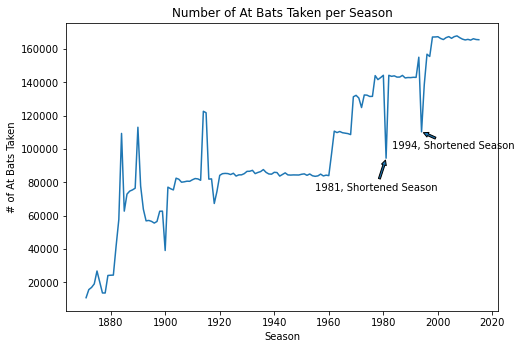

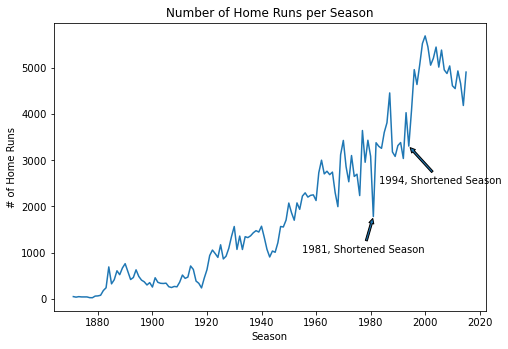

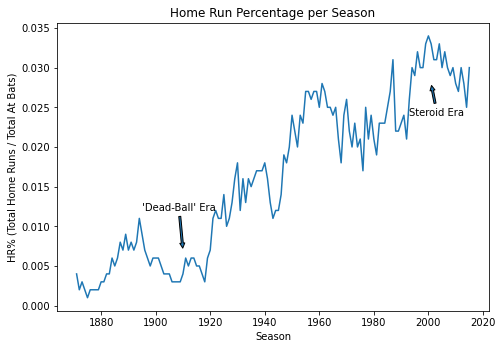

In [17]:
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.plot(year_totals.index.values, year_totals['ab'].values)
a.set_xlabel('Season')
a.set_ylabel('# of At Bats Taken')
a.set_title('Number of At Bats Taken per Season')
a.annotate("1981, Shortened Season", (1981,94467), (1955,75000), 
             arrowprops={'arrowstyle' : 'simple'})
a.annotate("1994, Shortened Season", (1994,110266), (1983,100000), 
            arrowprops={'arrowstyle' : 'simple'})
plt.show()

fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.plot(year_totals.index.values, year_totals['HR'].values)
a.set_xlabel('Season')
a.set_ylabel('# of Home Runs')
a.set_title('Number of Home Runs per Season')
a.annotate("1981, Shortened Season", (1981,1781), (1955,1000), 
             arrowprops={'arrowstyle' : 'simple'})
a.annotate("1994, Shortened Season", (1994,3306), (1983,2500), 
            arrowprops={'arrowstyle' : 'simple'})
plt.show()

fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.plot(year_totals.index.values, year_totals['HR%'].values)
a.set_xlabel('Season')
a.set_ylabel('HR% (Total Home Runs / Total At Bats)')
a.set_title('Home Run Percentage per Season')
a.annotate("'Dead-Ball' Era", (1910,0.007), (1895, 0.012), 
           arrowprops={'arrowstyle' : 'simple'})
a.annotate("Steroid Era", (2001,0.028), (1993, 0.024), 
           arrowprops={'arrowstyle' : 'simple'})
plt.show()

The increase of At-Bats per Year obviously correlates with an increase of home runs as well. But, as seen in the final chart, Home Run Percentage (Total HRs / Total ABs) is also on a fairly consistent increase since the 'Dead-Ball' Era of the early 1900s. It may have peaked in the late 1990's and early 2000's when sluggers such as Barry Bonds, Sammy Sosa, and Mark Mcguire drove the league to ban performance enhancing substances.